In [4]:
#import stuff here
import math
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#The file "Stand_Data.csv" generated from "Standardization.ipynb" is required
file_dir = "Stand_Data.csv"

data = np.loadtxt(file_dir, delimiter=",")
print(np.shape(data))

(39644, 58)


In [6]:
#define k-means algorithm as a function that takes a dataset, data, and a number of clusters ,k,
def k_means(data, k):
  #assign every image a representative
  group = np.random.randint(0,k, size=39644)

  #compute the mean of each representative
  representative = [np.zeros(58) for _ in range(k)] #initialize the representatives as all zeros
  for group_index in range(k):
    group_data = data[group==group_index, :]
    representative[group_index] = group_data.mean(axis=0)

  #implement the k-means algorithm
  repeat = True
  prev_J = 0
  while repeat:
    dist_squared = np.ones(39644)

    ###STEP 1: set each representative to the mean of the vectors assigned to it
    #print("step 1")
    #compute the new mean of each representative
    for group_index in range(k):
      group_data = data[group==group_index, :]
      representative[group_index] = group_data.mean(axis=0)

    ###STEP 2: assign each data point to the nearest group representative
    #print("step 2")
    #for each data point
    for i in range(39644):
      #reset comparisons
      comparisons = np.ones(k)*1515 #1515 = max possible value of comparisons
      #traverse through all representatives and calculate norm
      for j in range(k):
        comparisons[j] = np.linalg.norm(np.subtract(data[i],representative[j])) #list of distances between each representative
      #update closest representative for data point i
      group[i] = np.argmin(comparisons)
      dist_squared[i] = np.square(np.min(comparisons))

    ###STEP 3: calculate J and see if we need to repeat algorithm
    #print("step 3")
    J = (1/39644) * np.sum(dist_squared)
    quality = np.absolute(J-prev_J)
    if quality <= (0.0001*J):
      repeat = False
    else:
      prev_J = J
      print(f"clusters: {k}, Quality: {quality}, comparison: {0.0001*J}, prev_J: {prev_J}, J: {J}")
  #done
  #return the error score, the cluster representatives, and the groupings of each data point
  return J, representative, group

In [7]:
x = [] #the cluster number (k)
y = [] #the quality of that cluster (q)
r = [] #the representatives of each cluster
g = [] #the grouping of each data point

#test every multiple of 5 for k up untill 50
for i in range(5,51,5):
  q, reps, grps = k_means(data, i)
  x.append(i)
  y.append(q)
  r.append(reps)
  g.append(grps)

#find the best performing k value
best_index = np.argmin(y)
#if k is between 0 and 50, search surrounding k values of 5
if x[best_index] == 5:
  min = 1
  max = 5
elif x[best_index] == 50:
  min = 46
  max = 50
else:
  min = x[best_index]-4
  max = x[best_index]+5

#check every value +/- 5 of the previously best k value
for i in range(min, max, 1):
  if i%5 != 0:
    q, reps, grps = k_means(data, i)
    x.append(i)
    y.append(q)
    r.append(reps)
    g.append(grps)

clusters: 5, Quality: 57.78386864384187, comparison: 0.005778386864384187, prev_J: 57.78386864384187, J: 57.78386864384187
clusters: 5, Quality: 4.38700897437726, comparison: 0.0053396859669464615, prev_J: 53.39685966946461, J: 53.39685966946461
clusters: 5, Quality: 0.9244863526779028, comparison: 0.005247237331678671, prev_J: 52.47237331678671, J: 52.47237331678671
clusters: 5, Quality: 0.4615451676833686, comparison: 0.005201082814910335, prev_J: 52.01082814910334, J: 52.01082814910334
clusters: 5, Quality: 0.46565046703785384, comparison: 0.005154517768206549, prev_J: 51.545177682065486, J: 51.545177682065486
clusters: 5, Quality: 0.5438899203083025, comparison: 0.005100128776175719, prev_J: 51.00128776175718, J: 51.00128776175718
clusters: 5, Quality: 0.43363482627857763, comparison: 0.005056765293547861, prev_J: 50.567652935478606, J: 50.567652935478606
clusters: 5, Quality: 0.3367305229588595, comparison: 0.005023092241251975, prev_J: 50.230922412519746, J: 50.230922412519746
cl

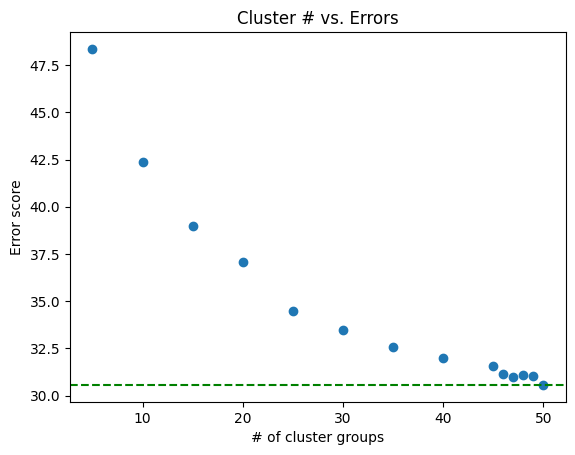

In [8]:
plt.scatter(x, y)
plt.xlabel("# of cluster groups")
plt.ylabel("Error score")
plt.title("Cluster # vs. Errors")
plt.axhline(y[best_index], color="green", xmin=0, xmax=52, linestyle="--")